In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the Titanic dataset
data = pd.read_csv('data/train.csv')

In [3]:
# Handle Missing Values

# Fill missing values in 'Age' with the median
data['Age'] = data['Age'].fillna(data['Age'].median())

# Drop the 'Cabin' column due to too many missing values
data = data.drop(columns=['Cabin'])

# Fill missing values in 'Embarked' with the mode
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [4]:
# Step 2: Encode Categorical Variables
# Encode 'Sex' column (0 for male, 1 for female)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# One-hot encode the 'Embarked' column
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [5]:
# Step 3: Feature Selection
# Select relevant features for the model
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']  # Target variable

In [6]:
# Step 4: Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
# Step 5: Split Data into Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Preprocessing Complete. Data is ready for modeling.")

Preprocessing Complete. Data is ready for modeling.


In [8]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import matplotlib.pyplot as plt

In [9]:
# Step 1: Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

In [10]:

# Step 2: Define Hyperparameters for Tuning
# Here we will tune 'max_depth' and 'min_samples_split' to optimize the model
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

In [11]:
# Step 3: Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [12]:
# Step 4: Retrieve the best model
best_dt = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters: {'max_depth': 3, 'min_samples_split': 2}
Best cross-validation accuracy: 0.821609376538954


In [13]:
# Step 5: Train the best model on the full training set
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

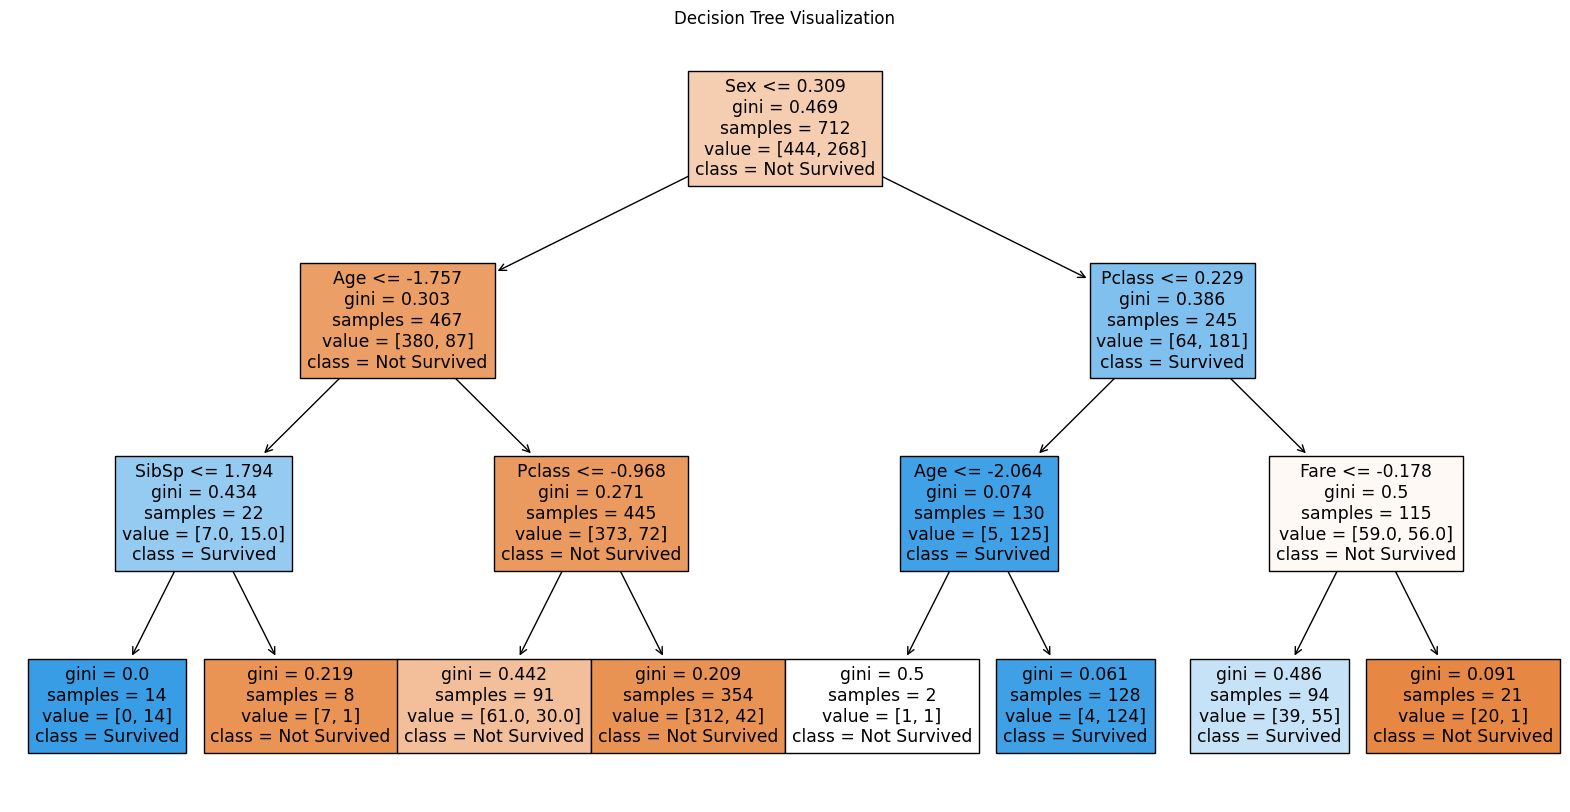

In [14]:
# Step 6: Plot the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(best_dt, filled=True, feature_names=features, class_names=['Not Survived', 'Survived'])
plt.title("Decision Tree Visualization")
plt.show()

In [15]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score

In [16]:
# Step 1: Apply 5-fold Cross-Validation on the Fine-Tuned Decision Tree
cv_scores_dt = cross_val_score(best_dt, X_train, y_train, cv=5, scoring='accuracy')

In [17]:
# Step 2: Calculate the Average Classification Accuracy
avg_accuracy_dt = cv_scores_dt.mean()
print("5-Fold Cross-Validation Accuracy for Decision Tree:", avg_accuracy_dt)

5-Fold Cross-Validation Accuracy for Decision Tree: 0.821609376538954


In [18]:
# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
# Step 1: Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

In [20]:
# Step 2: Define Hyperparameters for Tuning
# We’ll tune 'n_estimators' and 'max_depth' for the Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10]
}

In [21]:
# Step 3: Use GridSearchCV to find the best hyperparameters
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [22]:
# Step 4: Retrieve the best Random Forest model
best_rf = grid_search_rf.best_estimator_
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation accuracy for Random Forest:", grid_search_rf.best_score_)

Best parameters for Random Forest: {'max_depth': 7, 'n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.8314192849404117


In [23]:
# Step 5: Apply 5-fold Cross-Validation on the Fine-Tuned Random Forest Model
cv_scores_rf = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')

In [24]:
# Step 6: Calculate the Average Classification Accuracy
avg_accuracy_rf = cv_scores_rf.mean()
print("5-Fold Cross-Validation Accuracy for Random Forest:", avg_accuracy_rf)

5-Fold Cross-Validation Accuracy for Random Forest: 0.8314192849404117


In [25]:
# Print a summary of the comparison
if avg_accuracy_rf > avg_accuracy_dt:
    print("Random Forest has a higher average accuracy than Decision Tree.")
    print(f"Average Accuracy of Decision Tree: {avg_accuracy_dt}")
    print(f"Average Accuracy of Random Forest: {avg_accuracy_rf}")
    print("Conclusion: Random Forest is the better model for this dataset.")
else:
    print("Decision Tree has a higher average accuracy than Random Forest.")
    print(f"Average Accuracy of Decision Tree: {avg_accuracy_dt}")
    print(f"Average Accuracy of Random Forest: {avg_accuracy_rf}")
    print("Conclusion: Decision Tree is the better model for this dataset.")

Random Forest has a higher average accuracy than Decision Tree.
Average Accuracy of Decision Tree: 0.821609376538954
Average Accuracy of Random Forest: 0.8314192849404117
Conclusion: Random Forest is the better model for this dataset.
